In [1]:
## importation des packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()

Saving gft_cards.csv.xls to gft_cards.csv.xls


In [5]:
data = pd.read_csv('gft_cards.csv.xls')


In [6]:
data.head()

,Description,Price,Rating,Review Count,URL
0,Amazon.com eGift Card,$1.00,4.8 out of 5 stars,"(902,600)",https://www.amazon.com/Amazon-eGift-Card-Logo/...
1,Amazon.com Gift Card Balance Reload,$0.50,4.6 out of 5 stars,"(372,292)",https://www.amazon.com/Amazon-com-Gift-Card-Ba...
2,Amazon.com Print at Home Gift Card,$1.00,4.8 out of 5 stars,"(84,199)",https://www.amazon.com/Amazon-Gift-Card-Print-...
3,Amazon.com Gift Card in a Reveal (Various Desi...,$20.00,4.9 out of 5 stars,"(78,768)",https://www.amazon.com/Amazon-com-Reveal-Class...
4,Amazon.com Gift Card in a Greeting Card (Vario...,$10.00,4.8 out of 5 stars,"(70,425)",https://www.amazon.com/Amazon-com-Greeting-Bir...


#  DATA INFOS

In [7]:
print(data.shape)

(366, 5)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Description   366 non-null    object
 1   Price         366 non-null    object
 2   Rating        343 non-null    object
 3   Review Count  343 non-null    object
 4   URL           366 non-null    object
dtypes: object(5)
memory usage: 14.4+ KB


On est s'interesser de savoir les distinct item for each columns et leurs occurences

In [9]:
All_col=data.columns.values

In [10]:
def valuecount(l,data):
    for i in l:
        print("______________________________________________")
        print('les distincts items et occurences  de ', i)
        print( data[i].value_counts())

In [11]:
valuecount(All_col,data)

______________________________________________
les distincts items et occurences  de  Description
Amazon.com Gift Card in a Reveal (Various Designs)           3
Amazon.com Gift Card in a Greeting Card (Various Designs)    3
Amazon.com eGift Card                                        2
Hotels.com Gift Card - Email Delivery                        2
Nordstrom Gift Card - Email Delivery                         2
                                                            ..
Taco Casa Gift Cards - E-mail Delivery                       1
OH BABY Gift Card - Email Delivery                           1
Gap Gift Cards - Email Delivery                              1
JCPenney Gift Cards - Email Delivery                         1
Banana Republic Gift Cards - E-mail Delivery                 1
Name: Description, Length: 308, dtype: int64
______________________________________________
les distincts items et occurences  de  Price
$25.00     286
$50.00      25
$20.00       7
$100.00      6
$1.00       

###DATA CLEANING

In [13]:
data.head()

,Description,Price,Rating,Review Count,URL
0,Amazon.com eGift Card,$1.00,4.8 out of 5 stars,"(902,600)",https://www.amazon.com/Amazon-eGift-Card-Logo/...
1,Amazon.com Gift Card Balance Reload,$0.50,4.6 out of 5 stars,"(372,292)",https://www.amazon.com/Amazon-com-Gift-Card-Ba...
2,Amazon.com Print at Home Gift Card,$1.00,4.8 out of 5 stars,"(84,199)",https://www.amazon.com/Amazon-Gift-Card-Print-...
3,Amazon.com Gift Card in a Reveal (Various Desi...,$20.00,4.9 out of 5 stars,"(78,768)",https://www.amazon.com/Amazon-com-Reveal-Class...
4,Amazon.com Gift Card in a Greeting Card (Vario...,$10.00,4.8 out of 5 stars,"(70,425)",https://www.amazon.com/Amazon-com-Greeting-Bir...


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Description   366 non-null    object
 1   Price         366 non-null    object
 2   Rating        343 non-null    object
 3   Review Count  343 non-null    object
 4   URL           366 non-null    object
dtypes: object(5)
memory usage: 14.4+ KB


In [15]:
data.duplicated().sum()

0

In [16]:
#checking for null values
data.isnull().sum()

Description      0
Price            0
Rating          23
Review Count    23
URL              0
dtype: int64

had lcode 5ass nshofo ash kidir


In [17]:
data.dropna(inplace=True)

In [18]:
data.isnull().sum()

Description     0
Price           0
Rating          0
Review Count    0
URL             0
dtype: int64

In [19]:
data['Price'] = data['Price'].str.replace('$', '')

<ipython-input-19-ad71304e4ed8>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace('$', '')


In [20]:
data['Price'] = data['Price'].astype(float)

In [21]:
data['Rating'] = data['Rating'].str.extract('(\d+\.\d+)')

In [22]:
data['Rating'] = data['Rating'].astype(float)

In [37]:
# Replace commas with periods in the 'ReviewCount' column
data['Review Count'] = data['Review Count'].str.replace(',', '.')
data['Review Count'] = data['Review Count'].str.replace('(', '')
data['Review Count'] = data['Review Count'].str.replace(')', '')

# Convert the 'ReviewCount' column to a float
data['Review Count'] = data['Review Count'].astype(float)

<ipython-input-37-e47de29294b9>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Review Count'] = data['Review Count'].str.replace('(', '')
<ipython-input-37-e47de29294b9>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Review Count'] = data['Review Count'].str.replace(')', '')


In [39]:
data.head() 

,Description,Price,Rating,Review Count,URL
0,Amazon.com eGift Card,1.0,4.8,902.600,https://www.amazon.com/Amazon-eGift-Card-Logo/...
1,Amazon.com Gift Card Balance Reload,0.5,4.6,372.292,https://www.amazon.com/Amazon-com-Gift-Card-Ba...
2,Amazon.com Print at Home Gift Card,1.0,4.8,84.199,https://www.amazon.com/Amazon-Gift-Card-Print-...
3,Amazon.com Gift Card in a Reveal (Various Desi...,20.0,4.9,78.768,https://www.amazon.com/Amazon-com-Reveal-Class...
4,Amazon.com Gift Card in a Greeting Card (Vario...,10.0,4.8,70.425,https://www.amazon.com/Amazon-com-Greeting-Bir...


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 365
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Description   343 non-null    object 
 1   Price         343 non-null    float64
 2   Rating        343 non-null    float64
 3   Review Count  343 non-null    float64
 4   URL           343 non-null    object 
dtypes: float64(3), object(2)
memory usage: 16.1+ KB


# **DATA VALUES**

##Analyse descriptive

In [41]:
data.describe()

,Price,Rating,Review Count
count,343.000000,343.000000,343.000000
mean,29.090117,4.601166,147.483125
std,20.523186,0.569445,229.640458
min,0.500000,1.000000,1.000000
25%,25.000000,4.600000,4.628500
50%,25.000000,4.800000,39.000000
75%,25.000000,4.900000,174.000000
max,250.000000,5.000000,998.000000


In [42]:
data.corr()

,Price,Rating,Review Count
Price,1.000000,-0.141849,0.036903
Rating,-0.141849,1.000000,0.116429
Review Count,0.036903,0.116429,1.000000


les var sont independants

In [44]:

# Define the categories and corresponding keywords
categories = {
    'Birthday': ['birthday', 'celebrate', 'anniversary'],
    'Beauty': ['beauty', 'makeup', 'spa','sephora','body','hair',' secret'],
    'Holidays': ['holiday', 'Christmas', 'Easter', 'Thanksgiving', 'Hanukkah'],
    'New Year': ['new year', 'resolutions', 'new beginnings'],
    'Congratulations': ['congratulations', 'congrats', 'graduation', 'greeting'],
    'Thank You': ['thank you', 'gratitude', 'appreciation'],
    'Wedding': ['wedding', 'bride', 'groom', 'honeymoon'],
    'Baby Shower': ['baby shower', 'new baby', 'pregnancy', 'infant','baby'],
    'Phone': ['iPhone'],
    'eGift Card': ['eGift Card'],
    'Housewarming': ['housewarming', 'new home', 'moving'],
    'Sympathy': ['sympathy', 'condolence', 'funeral'],
    'Get Well Soon': ['get well soon', 'recovery', 'healing'],
    'Just Because': ['just because', 'random', 'surprise'],
    'Business': ['business', 'corporate', 'partnership'],
    'Food & Beverage': ['food', 'beverage', 'restaurant','starbucks'],
    'Travel & Experience': ['travel', 'experience', 'adventure','uber','hotel','pack'],
    'Sports & Outdoors': ['sports', 'outdoors', 'exercise','foot'],
    'Books & Media': ['books', 'media', 'reading','netflix','instacart','twitch','grubhub'],
    'Arts & Crafts': ['arts', 'crafts', 'creative'],
    'Electronics': ['electronics', 'tech', 'gadgets','razer'],
    'Games & Toys': ['games', 'toys', 'play'],
    'Pet Supplies': ['pet', 'animal', 'dog', 'cat'],
    'Music & Entertainment': ['music', 'entertainment', 'concert'],
    'Fashion & Accessories': ['fashion', 'accessories', 'style'],
    'Home & Garden': ['home', 'garden', 'decoration','door'],
    'Office & School': ['office', 'school', 'learning'],
    'Charity & Donations': ['charity', 'donation', 'giving'],
    'Other': []
}

# Define a function to assign categories based on keywords
def assign_category(description):
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in description.lower():
                return category
    return 'Other'

# Apply the function to the 'Description' column and create a new column 'Category'
data['Category'] = data['Description'].apply(assign_category)

In [45]:
data.head()

,Description,Price,Rating,Review Count,URL,Category
0,Amazon.com eGift Card,1.0,4.8,902.600,https://www.amazon.com/Amazon-eGift-Card-Logo/...,Other
1,Amazon.com Gift Card Balance Reload,0.5,4.6,372.292,https://www.amazon.com/Amazon-com-Gift-Card-Ba...,Other
2,Amazon.com Print at Home Gift Card,1.0,4.8,84.199,https://www.amazon.com/Amazon-Gift-Card-Print-...,Home & Garden
3,Amazon.com Gift Card in a Reveal (Various Desi...,20.0,4.9,78.768,https://www.amazon.com/Amazon-com-Reveal-Class...,Other
4,Amazon.com Gift Card in a Greeting Card (Vario...,10.0,4.8,70.425,https://www.amazon.com/Amazon-com-Greeting-Bir...,Congratulations


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


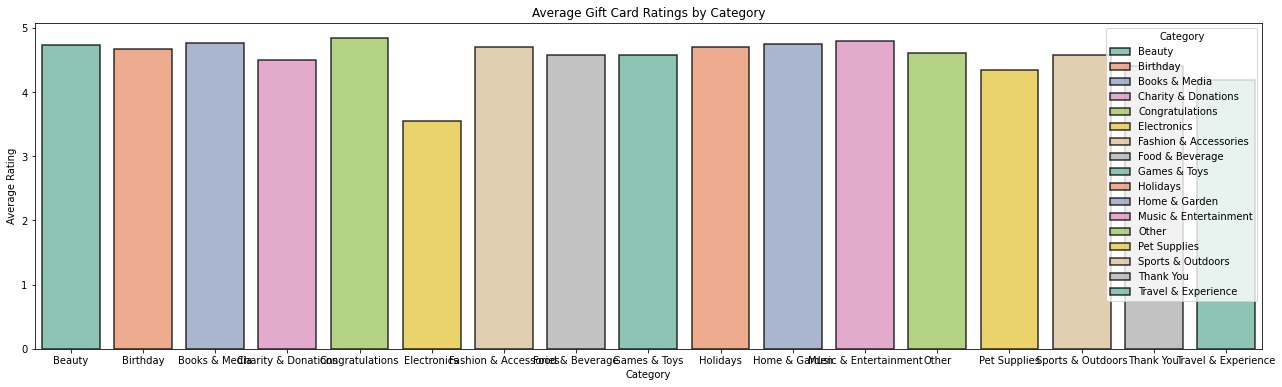

In [48]:
# Calculate the mean rating for each category
mean_ratings = data.groupby("Category")["Rating"].mean().reset_index()

# Set the figure size
plt.figure(figsize=(20, 6))

# Create the bar plot
sns.barplot(x="Category", y="Rating", data=mean_ratings, hue="Category", dodge=False, palette="Set2", alpha=0.8, ci=None, edgecolor='black', linewidth=1.5)

# Set the x-axis label
plt.xlabel("Category")

# Set the y-axis label
plt.ylabel("Average Rating")

# Set the title
plt.title("Average Gift Card Ratings by Category")

# Display the plot
plt.show()

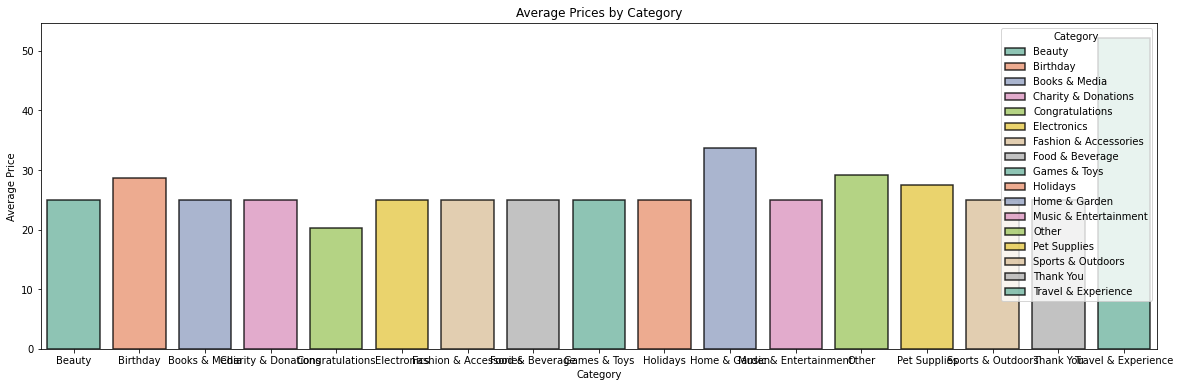

In [49]:
# Group the data by 'Category' and calculate the mean price
mean_price = data.groupby('Category')['Price'].mean()

# Convert the resulting Series back to a DataFrame
mean_price = mean_price.to_frame().reset_index()

# Set the size of the figure
plt.figure(figsize=(20, 6))

# Create a bar plot
sns.barplot(x='Category', y='Price', data=mean_price ,  hue="Category", dodge=False, palette="Set2", alpha=0.8, ci=None, edgecolor='black', linewidth=1.5)

# Set the title and axis labels
plt.title('Average Prices by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')

# Display the plot
plt.show()

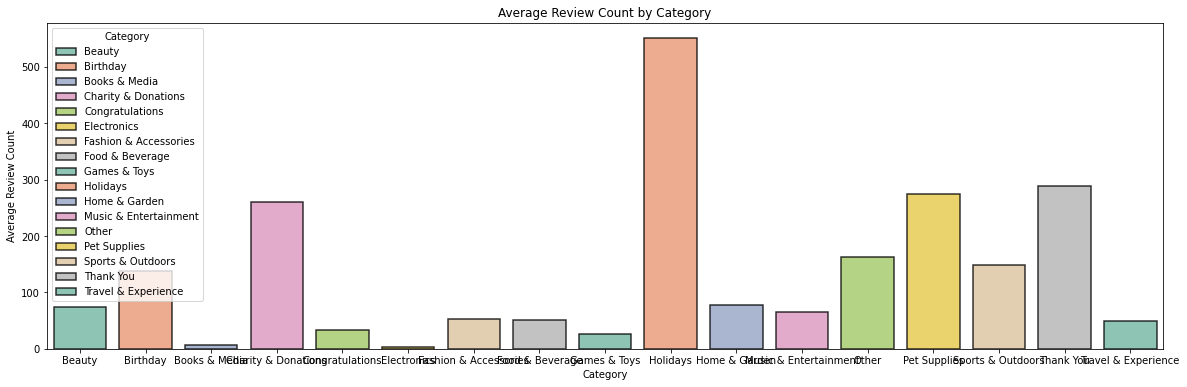

In [50]:
# Group the data by 'Category' and calculate the mean Review Count
mean_Review = data.groupby('Category')['Review Count'].mean()

# Convert the resulting Series back to a DataFrame
mean_Review= mean_Review.to_frame().reset_index()

# Set the size of the figure
plt.figure(figsize=(20, 6))

# Create a bar plot
sns.barplot(x='Category', y='Review Count', data=mean_Review  ,  hue="Category", dodge=False, palette="Set2", alpha=0.8, ci=None, edgecolor='black', linewidth=1.5)

# Set the title and axis labels
plt.title('Average Review Count by Category')
plt.xlabel('Category')
plt.ylabel('Average Review Count')

# Display the plot
plt.show()